In [38]:
bias = Signal("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/bias/NMSSM/NMSSM_XYH_YToHH_6b_MX_1200_MY_300/ntuple.root")
btag_pt = Signal("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_pt/NMSSM/NMSSM_XYH_YToHH_6b_MX_1200_MY_300/ntuple.root")
btag = Signal("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/NMSSM/NMSSM_XYH_YToHH_6b_MX_1200_MY_300/ntuple.root")

# bias_74 = Signal("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/bias/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root")
# btag_pt_74 = Signal("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_pt/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root")

/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/bias/NMSSM/NMSSM_XYH_YToHH_6b_MX_1200_MY_300/ntuple.root
/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_pt/NMSSM/NMSSM_XYH_YToHH_6b_MX_1200_MY_300/ntuple.root
/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/NMSSM/NMSSM_XYH_YToHH_6b_MX_1200_MY_300/ntuple.root


In [39]:
bias.nevents, btag_pt.nevents, btag.nevents

(47145, 51439, 61929)

In [41]:
[ak.min(btag.jet_btag[:,i]) for i in range(6)]

[0.24731445, 0.029342651, 0.007659912, 0.004875183, 0.0022125244, 0.0013370514]

In [21]:
[ak.min(bias.jet_btag[:,i]) for i in range(6)], [ak.min(btag_pt.jet_btag[:,i]) for i in range(6)], [ak.min(bias_74.jet_btag[:,i]) for i in range(6)], [ak.min(btag_pt_74.jet_btag[:,i]) for i in range(6)]

([0.7104492, 0.7104492, 0.2783203, 0.2783203, 0.0014638901, 0.0012769699],
 [0.7104492, 0.7104492, 0.2783203, 0.2783203, 0.0014638901, 0.0012769699],
 [0.7104492, 0.7104492, 0.27856445, 0.2783203, 0.0011835098, 0.0012521744],
 [0.7104492, 0.7104492, 0.27856445, 0.2783203, 0.0011835098, 0.0012521744])

In [42]:
tight_1_cut_mask = btag.jet_btag[:,0] > jet_btagWP[3]
tight_2_cut_mask = btag.jet_btag[:,1] > jet_btagWP[3]
tight_3_cut_mask = btag.jet_btag[:,2] > jet_btagWP[3]
medium_3_cut_mask = btag.jet_btag[:,2] > jet_btagWP[2]
medium_4_cut_mask = btag.jet_btag[:,3] > jet_btagWP[2]

In [43]:
tight_1_cut = round(ak.sum(btag.jet_btag[:,0] > jet_btagWP[3]) / btag.nevents * 100, 1)
tight_2_cut = round(ak.sum(btag.jet_btag[:,1] > jet_btagWP[3]) / btag.nevents * 100, 1)
tight_3_cut = round(ak.sum(btag.jet_btag[:,2] > jet_btagWP[3]) / btag.nevents * 100, 1)
medium_3_cut = round(ak.sum(btag.jet_btag[:,2] > jet_btagWP[2]) / btag.nevents * 100, 1)
medium_4_cut = round(ak.sum(btag.jet_btag[:,3] > jet_btagWP[2]) / btag.nevents * 100, 1)

In [44]:
tttm_mask = tight_1_cut_mask & tight_2_cut_mask & tight_3_cut_mask & medium_4_cut_mask
ttmm_mask = tight_1_cut_mask & tight_2_cut_mask & medium_3_cut_mask & medium_4_cut_mask

In [54]:
btag.nevents, ak.sum(ttmm_mask)

(61929, 50940)

In [45]:
btag_pt_nh_found = \
    ak.where(ak.sum(btag_pt.jet_signalId == 0, axis=1) + ak.sum(btag_pt.jet_signalId == 1, axis=1) == 2, 1, 0) + \
    ak.where(ak.sum(btag_pt.jet_signalId == 2, axis=1) + ak.sum(btag_pt.jet_signalId == 3, axis=1) == 2, 1, 0) + \
    ak.where(ak.sum(btag_pt.jet_signalId == 4, axis=1) + ak.sum(btag_pt.jet_signalId == 5, axis=1) == 2, 1, 0)

btag_nh_found = \
    ak.where(ak.sum(btag.jet_signalId == 0, axis=1) + ak.sum(btag.jet_signalId == 1, axis=1) == 2, 1, 0) + \
    ak.where(ak.sum(btag.jet_signalId == 2, axis=1) + ak.sum(btag.jet_signalId == 3, axis=1) == 2, 1, 0) + \
    ak.where(ak.sum(btag.jet_signalId == 4, axis=1) + ak.sum(btag.jet_signalId == 5, axis=1) == 2, 1, 0)

bias_nh_found = \
    ak.where(ak.sum(bias.jet_signalId == 0, axis=1) + ak.sum(bias.jet_signalId == 1, axis=1) == 2, 1, 0) + \
    ak.where(ak.sum(bias.jet_signalId == 2, axis=1) + ak.sum(bias.jet_signalId == 3, axis=1) == 2, 1, 0) + \
    ak.where(ak.sum(bias.jet_signalId == 4, axis=1) + ak.sum(bias.jet_signalId == 5, axis=1) == 2, 1, 0)

btag_pt_74_nh_found = \
    ak.where(ak.sum(btag_pt_74.jet_signalId == 0, axis=1) + ak.sum(btag_pt_74.jet_signalId == 1, axis=1) == 2, 1, 0) + \
    ak.where(ak.sum(btag_pt_74.jet_signalId == 2, axis=1) + ak.sum(btag_pt_74.jet_signalId == 3, axis=1) == 2, 1, 0) + \
    ak.where(ak.sum(btag_pt_74.jet_signalId == 4, axis=1) + ak.sum(btag_pt_74.jet_signalId == 5, axis=1) == 2, 1, 0)

bias_74_nh_found = \
    ak.where(ak.sum(bias_74.jet_signalId == 0, axis=1) + ak.sum(bias_74.jet_signalId == 1, axis=1) == 2, 1, 0) + \
    ak.where(ak.sum(bias_74.jet_signalId == 2, axis=1) + ak.sum(bias_74.jet_signalId == 3, axis=1) == 2, 1, 0) + \
    ak.where(ak.sum(bias_74.jet_signalId == 4, axis=1) + ak.sum(bias_74.jet_signalId == 5, axis=1) == 2, 1, 0)

In [47]:
bias_higgs_genflag = np.column_stack((bias.HX_b1_genHflag.to_numpy(), bias.HX_b2_genHflag.to_numpy(), bias.H1_b1_genHflag.to_numpy(), bias.H1_b2_genHflag.to_numpy(), bias.H2_b1_genHflag.to_numpy(), bias.H2_b2_genHflag.to_numpy()))
# bias_higgs_genflag

btag_higgs_genflag = np.column_stack((btag.HX_b1_genHflag.to_numpy(), btag.HX_b2_genHflag.to_numpy(), btag.H1_b1_genHflag.to_numpy(), btag.H1_b2_genHflag.to_numpy(), btag.H2_b1_genHflag.to_numpy(), btag.H2_b2_genHflag.to_numpy()))
btag_higgs_genflag

btag_pt_higgs_genflag = np.column_stack((btag_pt.HX_b1_genHflag.to_numpy(), btag_pt.HX_b2_genHflag.to_numpy(), btag_pt.H1_b1_genHflag.to_numpy(), btag_pt.H1_b2_genHflag.to_numpy(), btag_pt.H2_b1_genHflag.to_numpy(), btag_pt.H2_b2_genHflag.to_numpy()))
btag_pt_higgs_genflag

bias_74_higgs_genflag = np.column_stack((bias_74.HX_b1_genHflag.to_numpy(), bias_74.HX_b2_genHflag.to_numpy(), bias_74.H1_b1_genHflag.to_numpy(), bias_74.H1_b2_genHflag.to_numpy(), bias_74.H2_b1_genHflag.to_numpy(), bias_74.H2_b2_genHflag.to_numpy()))
bias_74_higgs_genflag

btag_pt_74_higgs_genflag = np.column_stack((btag_pt_74.HX_b1_genHflag.to_numpy(), btag_pt_74.HX_b2_genHflag.to_numpy(), btag_pt_74.H1_b1_genHflag.to_numpy(), btag_pt_74.H1_b2_genHflag.to_numpy(), btag_pt_74.H2_b1_genHflag.to_numpy(), btag_pt_74.H2_b2_genHflag.to_numpy()))
btag_pt_74_higgs_genflag

array([[ 0,  0,  1,  1,  2,  2],
       [-1,  0,  1,  2,  1,  0],
       [ 1,  1,  0,  2,  2,  0],
       ...,
       [ 1,  0, -1,  0,  2,  1],
       [ 1,  1,  0, -1,  0,  2],
       [ 0,  1,  2, -1,  0,  1]], dtype=int32)

In [48]:
bias_nh_found = ((np.sum(bias_higgs_genflag == 0, axis = 1) == 2)*1 + (np.sum(bias_higgs_genflag == 1, axis = 1) == 2)*1 + (np.sum(bias_higgs_genflag == 2, axis = 1) == 2)*1).flatten()

btag_pt_nh_found = ((np.sum(btag_pt_higgs_genflag == 0, axis = 1) == 2)*1 + (np.sum(btag_pt_higgs_genflag == 1, axis = 1) == 2)*1 + (np.sum(btag_pt_higgs_genflag == 2, axis = 1) == 2)*1).flatten()

btag_nh_found = ((np.sum(btag_higgs_genflag == 0, axis = 1) == 2)*1 + (np.sum(btag_higgs_genflag == 1, axis = 1) == 2)*1 + (np.sum(btag_higgs_genflag == 2, axis = 1) == 2)*1).flatten()

bias_74_nh_found = ((np.sum(bias_74_higgs_genflag == 0, axis = 1) == 2)*1 + (np.sum(bias_74_higgs_genflag == 1, axis = 1) == 2)*1 + (np.sum(bias_74_higgs_genflag == 2, axis = 1) == 2)*1).flatten()

btag_pt_74_nh_found = ((np.sum(btag_pt_74_higgs_genflag == 0, axis = 1) == 2)*1 + (np.sum(btag_pt_74_higgs_genflag == 1, axis = 1) == 2)*1 + (np.sum(btag_pt_74_higgs_genflag == 2, axis = 1) == 2)*1).flatten()

In [49]:
bias_ncorrect = ((bias.HX_b1_genHflag == 0) & (bias.HX_b2_genHflag == 0))*1 + ((bias.H1_b1_genHflag == 1) & (bias.H1_b2_genHflag == 1))*1 + ((bias.H2_b1_genHflag == 2) & (bias.H2_b2_genHflag == 2))*1

btag_pt_ncorrect = ((btag_pt.HX_b1_genHflag == 0) & (btag_pt.HX_b2_genHflag == 0))*1 + ((btag_pt.H1_b1_genHflag == 1) & (btag_pt.H1_b2_genHflag == 1))*1 + ((btag_pt.H2_b1_genHflag == 2) & (btag_pt.H2_b2_genHflag == 2))*1

btag_ncorrect = ((btag.HX_b1_genHflag == 0) & (btag.HX_b2_genHflag == 0))*1 + ((btag.H1_b1_genHflag == 1) & (btag.H1_b2_genHflag == 1))*1 + ((btag.H2_b1_genHflag == 2) & (btag.H2_b2_genHflag == 2))*1

bias_74_ncorrect = ((bias_74.HX_b1_genHflag == 0) & (bias_74.HX_b2_genHflag == 0))*1 + ((bias_74.H1_b1_genHflag == 1) & (bias_74.H1_b2_genHflag == 1))*1 + ((bias_74.H2_b1_genHflag == 2) & (bias_74.H2_b2_genHflag == 2))*1

btag_pt_74_ncorrect = ((btag_pt_74.HX_b1_genHflag == 0) & (btag_pt_74.HX_b2_genHflag == 0))*1 + ((btag_pt_74.H1_b1_genHflag == 1) & (btag_pt_74.H1_b2_genHflag == 1))*1 + ((btag_pt_74.H2_b1_genHflag == 2) & (btag_pt_74.H2_b2_genHflag == 2))*1

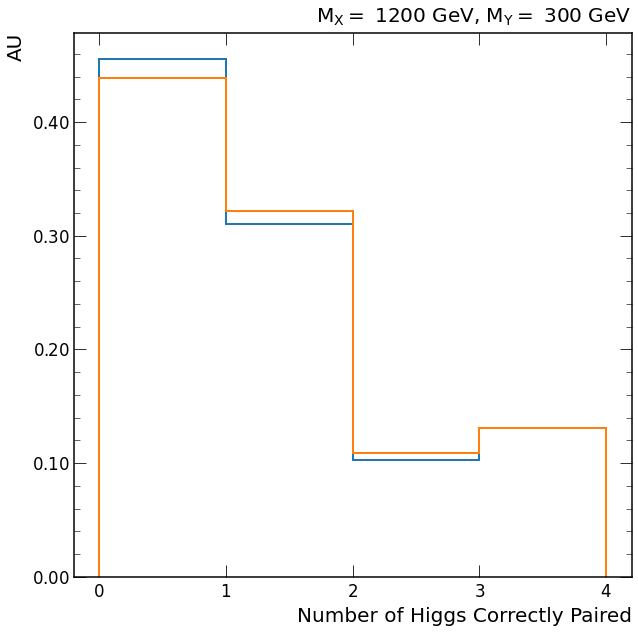

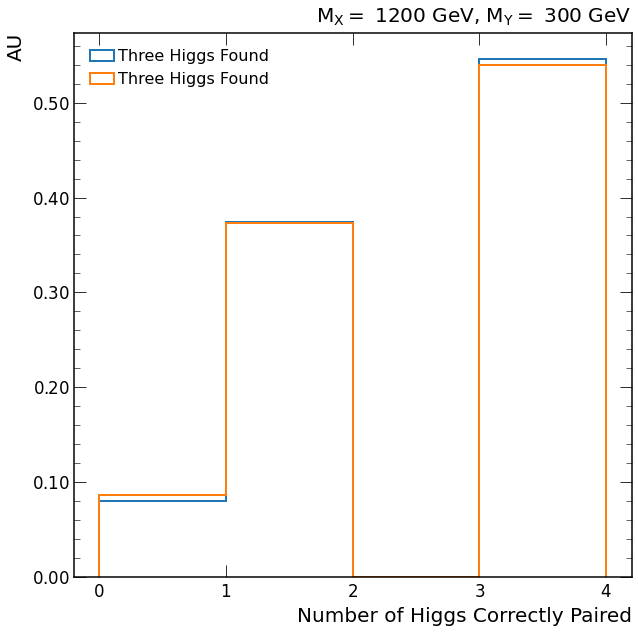

In [53]:
fig, ax = plt.subplots()

# n = bias.hist(bias_ncorrect, bins=np.arange(5), ax=ax, density=True)
n = bias.hist(btag_pt_ncorrect, bins=np.arange(5), ax=ax, density=True)
n = btag.hist(btag_ncorrect[ttmm_mask], bins=np.arange(5), ax=ax, density=True)

# n = bias.hist(bias_74_ncorrect, bins=np.arange(5), ax=ax, density=True)
# n = bias.hist(btag_pt_74_ncorrect, bins=np.arange(5), ax=ax, density=True)

ax.set_xlabel("Number of Higgs Correctly Paired")

fig.savefig("plots/3_evt_selections/btag_pt/nhiggs_1d_1200_300.pdf")

fig, ax = plt.subplots()

# n = bias.hist(bias_ncorrect[bias_nh_found == 3], bins=np.arange(5), ax=ax, density=True, label='Three Higgs Found')
n = btag_pt.hist(btag_pt_ncorrect[btag_pt_nh_found == 3], bins=np.arange(5), ax=ax, density=True, label='Three Higgs Found')
n = btag_pt.hist(btag_ncorrect[(btag_nh_found == 3) & ttmm_mask], bins=np.arange(5), ax=ax, density=True, label='Three Higgs Found')

# n = bias_74.hist(bias_74_ncorrect[bias_74_nh_found == 3], bins=np.arange(5), ax=ax, density=True, label='Three Higgs Found')
# n = btag_pt_74.hist(btag_pt_74_ncorrect[btag_pt_74_nh_found == 3], bins=np.arange(5), ax=ax, density=True, label='Three Higgs Found')

ax.set_xlabel("Number of Higgs Correctly Paired")
ax.legend(loc=2)

fig.savefig("plots/3_evt_selections/btag_pt/nhiggs_3h_1d_1200_300.pdf")

# fig, ax = plt.subplots()

# # n = btag.hist(btag_ncorrect[btag_nb_presel == 6], bins=np.arange(5), ax=ax, density=True)
# n = bias.hist(bias_ncorrect[bias_nh_found == 2], bins=np.arange(5), ax=ax, density=True, label='Two Higgs Found')

# ax.set_xlabel("Number of Higgs Correctly Paired")
# ax.legend()

# fig.savefig("plots/3_evt_selections/bias/nhiggs_2h_1d.pdf")

# fig, ax = plt.subplots()

# # n = btag.hist(btag_ncorrect[btag_nb_presel == 6], bins=np.arange(5), ax=ax, density=True)
# n = bias.hist(bias_ncorrect[bias_nh_found == 1], bins=np.arange(5), ax=ax, density=True, label='One Higgs Found')

# ax.set_xlabel("Number of Higgs Correctly Paired")
# ax.legend()

# fig.savefig("plots/3_evt_selections/bias/nhiggs_1h_1d.pdf")

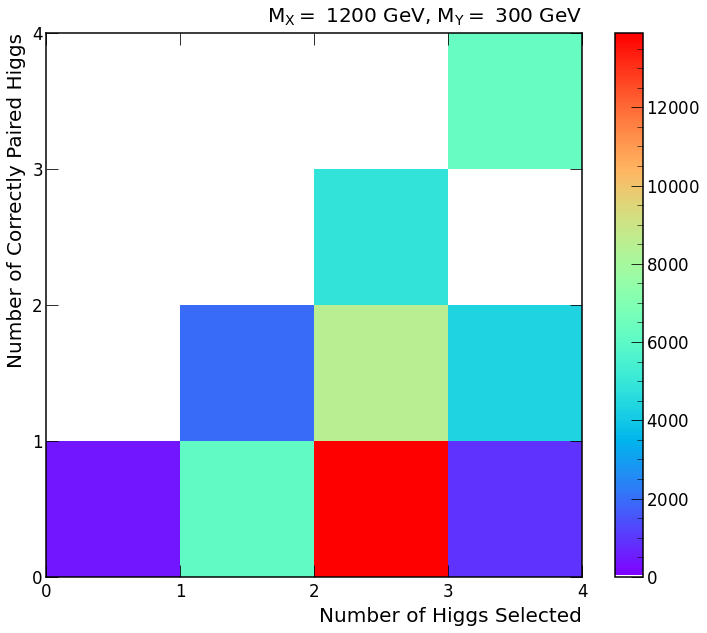

In [37]:
fig, ax = plt.subplots(figsize=(12,10))

n, xe, xy, im = Hist2d(bias_nh_found, bias_ncorrect, bins=np.arange(5), ax=ax)

ax.minorticks_off()

ax.set_xticks(np.arange(5), np.arange(5))
ax.set_yticks(np.arange(5), np.arange(5))

ax.set_xlabel("Number of Higgs Selected")
ax.set_ylabel("Number of Correctly Paired Higgs")

ax.set_title(bias.sample)

fig.colorbar(im, ax=ax)

fig.savefig("plots/3_evt_selections/btag_pt/nhiggs_2d_1200_300.pdf")